#CSE5DL Assignment

### Assignment due date: Friday 31/5/2024

Penalties are applied to late assignments (accepted up to 5 business days after the due date only). Five percent is deducted per business day late. A mark of zero will be assigned to assignments submitted more than 5 days late.

<font color='red'> This is an individual assignment. You are not permitted to work as a part of a group when writing this assignment. </font>

### Assignment submission

Please zip all `*.ipynb`, `*.py`, `*.docx` and `*.xlsx` files into a single zip file and submit the zipped file via the link provided on LMS.

### Copying, Plagiarism
Plagiarism is the submission of somebody else’s work in a manner that gives the impression that the work is your own. For individual assignments, plagiarism includes the case where two or more students work collaboratively on the assignment.  The Department of Computer Science and Information Technology treats plagiarism very seriously.  When it is detected, penalties are strictly imposed.

### ChatGPT
A key purpose of this assessment task is to test your own ability to complete the assigned tasks.  Therefore, the use of ChatGPT, AI tools or chatbots with similar functionality is prohibited for this assessment task. Students who are found to be in breach of this rule will be subject to normal academic misconduct measures.  Additionally, students may be engaged to provide an oral validation of their understanding of their submitted work (e.g. coding).





# Introduction

**DESCRIPTION:** In this assignment we have provided you with skeleton code. We have an image dataset and a text dataset, and you must train deep learning models for them. With the exception of Task 2b, all of the code required has already been shown to you in the labs.

In this assignment you will be required to write code and write short answer responses to questions in a structured report. You have been provided with a template Word document of this report in which you simply have to fill in the blanks (1-3 sentences is expected).

Throughout this assignment, there are a few challenge questions worth bonus marks. Task 1 is worth 66 marks and Task 2 is worth 32 marks, totalling 98 marks possible before challenge questions. You can receive up to 10 marks from the bonus questions, so the maximum number of marks you can get is 108. However if you get over 100 marks the actual mark you will receive is 100% for the assignment assessment component of your grades.  Unless otherwise stated all marks quoted do not include challenge questions.

There are 71 marks associated with code and 27 marks associated with the report.

**INSTRUCTIONS:**

1.   Copy the skeleton files to your Google Drive.
2.   Edit `SKELETON_DIR` in the first cell to point to the skeleton files you uploaded in step 1. The provided code assumes you have uploaded them to "Uni/CSE5DL/Assignment" in your Google Drive.
3.   Run the following two cells


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory for the assignment
import os
#SKELETON_DIR = '/content/drive/MyDrive/Uni/CSE5DL/Assignment'
SKELETON_DIR = '/content/drive/My Drive/CSE5DL/Assignment CSE5DL 2024 release'

os.chdir(SKELETON_DIR)
! mkdir -p "$SKELETON_DIR/saved_models"
! mkdir -p "$SKELETON_DIR/logs"

# Set up auto-reloading modules from the working directory
%load_ext autoreload
%autoreload 2

# Install extra dependencies
!pip install -q transformers==4.27.0
!pip install -q wandb==0.15.0
!pip install -q torchmetrics==0.11.3


# Set the default figure size
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120

Mounted at /content/drive
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.0/289.0 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 71.3 MB/s eta 0:00:00


In [ ]:
%%shell
DATA_URL='https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1'

pushd /content
wget -O data.zip $DATA_URL
unzip -q data.zip
popd

/content /content/drive/MyDrive/CSE5DL/Assignment CSE5DL 2024 release
--2024-05-30 23:30:12--  https://latrobeuni-my.sharepoint.com/:u:/g/personal/zhe_ltu_edu_au/Edn2-_XuX2pGptMfH6eVLIoB16_ofpRlZnCf6rwP47EkBQ?e=ogAWGM&download=1
Resolving latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)... 13.107.136.10, 13.107.138.10, 2620:1ec:8f8::10, ...
Connecting to latrobeuni-my.sharepoint.com (latrobeuni-my.sharepoint.com)|13.107.136.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1 [following]
--2024-05-30 23:30:14--  https://latrobeuni-my.sharepoint.com/personal/zhe_ltu_edu_au/Documents/CSE5DL%20data/data.zip?ga=1
Reusing existing connection to latrobeuni-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 1043211099 (995M) [application/x-zip-compressed]
Saving to: ‘data.zip’

data.zip            100%[===================>] 994.88M  50.4MB/s    in 27s     

2024-05

# Task 1 - Image Classification

**MARKS**: 66

In this first task, you will create a deep learning model to classify images of skin lesions into one of seven classes:

1.   "MEL" = Melanoma
2.   "NV" = Melanocytic nevus
3.   "BCC" = Basal cell carcinoma
4.   "AKIEC" = Actinic keratosis
5.   "BKL" = Benign keratosis
6.   "DF" = Dermatofibroma
7.   "VASC" = Vascular lesion

The data for this task is a subset of: https://challenge2018.isic-archive.com/task3/

The data for this task is inside the `/content/data/img` folder. It contains ~3,800 images named like `ISIC_000000.jpg` and the following label files:

*   `/content/data/img/train.csv`
*   `/content/data/img/val.csv`
*   `/content/data/img/train_small.csv`
*   `/content/data/img/val_small.csv`

The `small` versions are the first 200 lines of each partition and are included for debugging purposes. To save time, ensure your code runs on the `small` versions first.

**NOTE**: To explore the labels, you can click the above hyperlinks to open the relevant csv file.

## Task 1a. Explore the training set

**MARKS**: 5 (Code 3, Reports 2)

**INSTRUCTIONS**: Check for data issues, as we have done in the labs. Check the class distribution and at least 1 other potential data issue. Hint: Look in `explore.py` for a function that can plot the class distribution.

**REPORT**: What did you check for? What data issues are present in this dataset?

In [ ]:
import pandas as pd

IMG_CLASS_NAMES = ["MEL", "NV", "BCC", "AKIEC", "BKL", "DF", "VASC"]

train_df = pd.read_csv('/content/data/img/train.csv')
val_df = pd.read_csv('/content/data/img/val.csv')
train_df.head()

,image,MEL,NV,BCC,AKIEC,BKL,DF,VASC
0,ISIC_0024306,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0024307,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0024308,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0024309,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0024310,1.0,0.0,0.0,0.0,0.0,0.0,0.0


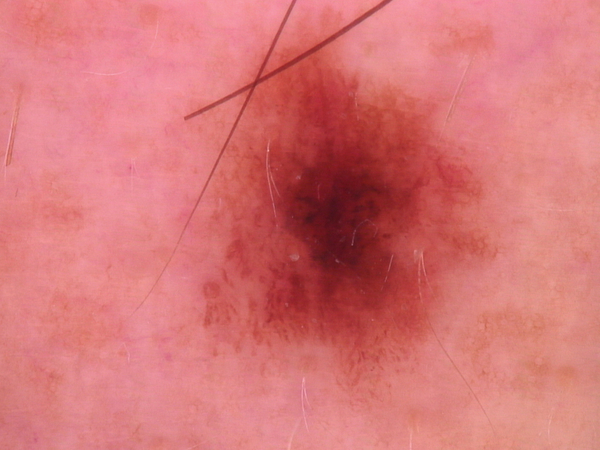

In [ ]:
from PIL import Image
# Change the filename to view other examples from the dataset
display(Image.open('/content/data/img/ISIC_0024306.jpg'))

Missing values in the training dataset: 
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64
 
Missing values in the validation dataset: 
image    0
MEL      0
NV       0
BCC      0
AKIEC    0
BKL      0
DF       0
VASC     0
dtype: int64
 
Training labels after converting from one-hot to intergers:
[1 1 1 ... 1 1 1]
Validation labels after converting from one-hot to intergers:
[4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 4 0 0 1 1 1 4 1 3 4 1 2 1 1 1 1 1 3 4 1 1
 1 1 1 0 1 0 1 4 4 1 1 1 0 1 1 1 1 1 2 1 4 1 1 4 2 1 1 4 1 1 1 1 1 1 1 1 1
 1 6 1 0 4 1 1 1 4 1 4 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 4 0
 1 1 1 1 2 1 1 4 1 1 1 1 2 1 4 0 4 1 1 1 1 0 1 1 1 1 3 1 1 1 4 3 1 4 4 1 1
 1 1 1 1 1 4 1 1 1 1 1 1 4 1 1 2 1 1 1 1 2 1 0 1 1 1 1 1 1 0 5 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 4 1 3 0 1 4 1 1 1 4 1 1 1 0 1 1 1 1 6 1 1 2 2 4 1 3 1 2
 1 4 1 1 3 1 1 1 1 1 1 1 2 2 2 1 1 1 3 1 0 1 1 1 1 1 1 4 0 0 3 6 1 1 1 1 1
 1 1 1 1 0 1 1 1 3 1 1 3 1 1 1 4 1 1 1 3 1 0 

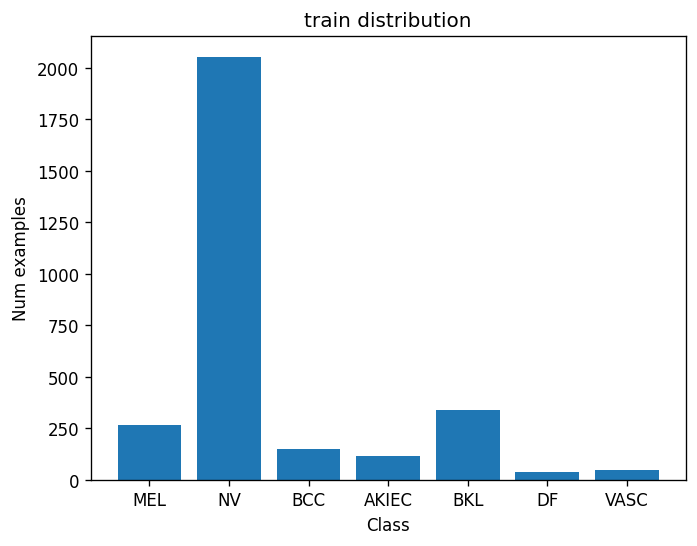

Validation Distribution Plot: 


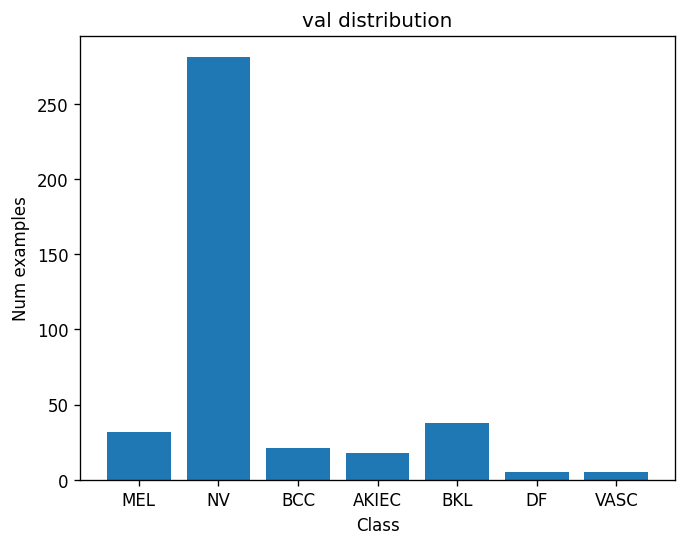

In [ ]:
import explore

# TODO - Check for data issues
# Check if there are any missing values in the dataset
print("Missing values in the training dataset: ")
print(train_df.isnull().sum())
print(" ")
print("Missing values in the validation dataset: ")
print(val_df.isnull().sum())
print(" ")

# convert from one-hot to integers with argmax
train_labels = train_df.values[:, 1:].argmax(axis=1)
val_labels = val_df.values[:, 1:].argmax(axis=1)

# print train_labels and val_labels
print("Training labels after converting from one-hot to intergers:")
print(train_labels)
print("Validation labels after converting from one-hot to intergers:")
print(val_labels)

# class names train
Class_Names_Train = train_df.columns[1:].tolist()
# plot the class distributions
print(" ")
print("Training Distribution Plot: ")
explore.plot_label_distribution(train_labels, 'train', Class_Names_Train)

# class names val
Class_Names_Val = val_df.columns[1:].tolist()
# plot the class distributions
print("Validation Distribution Plot: ")
explore.plot_label_distribution(val_labels, 'val', Class_Names_Val)

## Task 1b. Implement Training loop

**MARKS**: 17 (Code 15, Reports 2)

**INSTRUCTIONS**:

*   Implement LesionDataset in `datasets.py`. Use the cell below to test your implementation.
*   Implement the incomplete functions in `train.py` marked as "Task 1b"
*   Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code for "Task 1b".

**REPORT**: Why should you *not use* `random_split` in your code here?

In [ ]:
import datasets

ds = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
input, label = ds[122]
print(input.shape)
print(label)


torch.Size([3, 450, 600])
1


## Task 1c. Implement a baseline convolutional neural network

**MARKS**: 17 (Code 12, Reports 5)

You will implement a baseline convolutional neural network which you can compare results to. This allows you to evaluate any improvements made by hyperparameter tuning or transfer learning.

**INSTRUCTIONS**:

*   Implement a `SimpleBNConv` in `models.py` with:
    *   5 `nn.Conv2d` layers, with 8, 16, 32, 64, 128 output channels respectively, with the following between each convolution layer:
        *   `nn.ReLU()` for the activation function, and
        *   `nn.BatchNorm2d`, and
        *   finally a `nn.MaxPool2d` to downsample by a factor of 2.
*   Use a normalised confusion matrix on the model's validation predictions in `train.py`.
*  Go to the [Model Training Cell](#task-1-model-training) at the end of Task 1 and fill in the required code to train the model.

Training should take about 1 minute/epoch. Validation accuracy should be 60-70%, but UAR should be around 20-40%.

**REPORT**: As training sets get larger, the length of time per epoch also gets larger. Some datasets take over an hour per epoch. This makes it impractical to debug typos in your code since it can take hours after starting for the program to reach new code. Name two ways to significantly reduce how long each epoch takes - for debugging purposes - while still using real data and using the real training code.

**REPORT**: Show the confusion matrix and plots of the validation accuracy and UAR in your report, and explain what is going wrong.
(Right-click a plot and select "save image as..." to save the image to your computer)

## Task 1d. Account for data issues

> Indented block



**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**: Account for the data issues in Task 1a and retrain your model.

**REPORT**: How did you account for the data issues? Was it effective? How can you tell? Show another confusion matrix.

**IMPORTANT NOTE**: One of the techniques from the lab will cause a warning in the metric calculation on `train_small.csv`, but will work fine on `train.csv`.

## Task 1e. Data Augmentation

**MARKS**: 6 (Code 3, Reports 3)

**INSTRUCTIONS**:

*   Add an `augment` flag to LesionDataset which specifies whether any augmentation is done to the images. Ensure it is set to `True` *only* for the training dataset.
*   Use random horizontal flips
*   Use at least 2 other different non-deterministic augmentations

**REPORT:** Are random vertical flips appropriate for this dataset? Why?

Using data augmentation does not guarantee improved model performance. Data augmentation can hurt test performance by making the model train on unrealistic images.

**REPORT**: What effect did Data Augmentation have on performance? Show a screenshot of the relevant graphs from Weights & Biases for evidence.

**CHALLENGE**: (3 marks) Apply 5 crop augmentation with crop size 200x300. Make a distinct model which uses 5 crops at once to give a single answer. Include in your report how you did this and report the effect on performance.

## Task 1f. Chase improved performance

**MARKS**: 15 (Code and reports not separable for this task)

**INSTRUCTIONS**:
*   Create a model from a pre-trained model from the torchvision model zoo. We recommend Resnet18, but you may use any model you like. You may freeze the weights of all layers except the last, or fine-tune all the weights. https://cloudstor.aarnet.edu.au/plus/s/TsYJXyJWch0h7TD
*   Create your own models, modifying the model architecture, try different losses, learning rates. Change anything you like except the evaluation metrics in search of a better model.

Train at least 10 different models, each with a different combination.

**REPORT**: Create a table in an excel spreadsheet that is similar to that used in Lab 3 to record your results. Make sure it includes every parameter of variation between your combinations as a separate column. Include notes about what you were thinking/hoping for each combination as a number column in the spreadsheet.

In addition to the excel spreadsheet generate a report using Weights and Biases of the models you trained and the performance curves. Save the report as a pdf and include this in your submission. Please see this link on how to generate reports with Weights and Biases. https://docs.wandb.ai/guides/reports

Play around with Weights and Biases to see what cool features you can dig out and use to better visualize the training results and use that to improve the information shared via the report.

Write a discussion about the key findings from the experimental results.

**CHALLENGE REPORT**: (3 marks) Assuming you use the full dataset in a single epoch, if you halve the size of the batch size, what happens to the number of times that you update the weights per epoch? With reference to the gradients, under what circumstances is this good?

<a name="task-1-model-training"></a>
## Model Training Cell

Note we will be using Weights and Biases to keep track of our experimental runs and evaluation metrics. This is similar to lab 6. Please see lab 6 to learn how to use Weights and Biases.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▄▆▇█
Accuracy_val,▁█▄▆█
Loss_train,█▄▃▂▁
Loss_val,█▁▄▂▃
UAR_train,▁▃▅▇█
UAR_val,▄█▁██
Accuracy_train,0.93009
Accuracy_val,0.755
Loss_train,0.2325
Loss_val,0.79565
UAR_train,0.88002


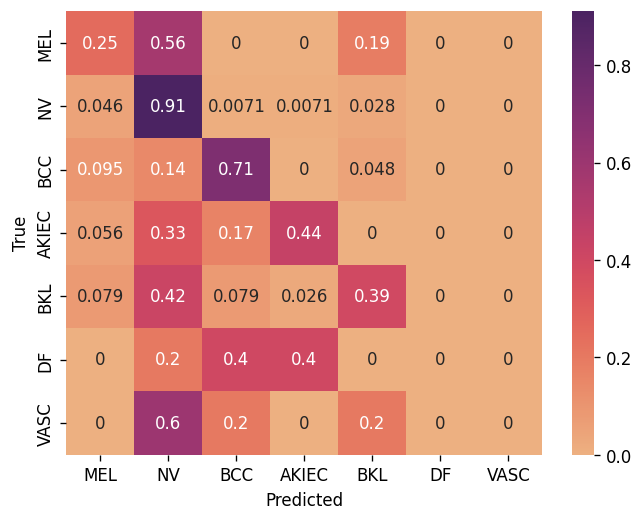

Model weights saved to saved_models/SimpleBNConv_Baseline model with learning rate 0.0001 Adam.pth


In [ ]:
# 1b
# 1c -- training the baseline model

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
# TODO Task 1b - Create the data loaders from LesionDatasets
# TODO Task 1d - Account for data issues, if applicable
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
# TODO Task 1c - Make an instance of your model, specifiy the optimizer and criterion you want to use
# TODO Task 1d - Account for data issues, if applicable
model = models.SimpleBNConv()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


# Train model
# TODO Task 1c: Set ident_str to a string that identifies this particular
#               training run. Note this line in the training code
#                     exp_name = f"{model.__class__.__name__}_{ident_str}"
#               So it means the the model class name is already included in the
#               exp_name string. You can consider adding other information
#               particular to this training run, e.g. learning rate (lr) used,
#               augmentation (aug) used or not, etc.

train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= "Baseline model with learning rate 0.0001 Adam")

In [ ]:
# Calculate weighted random sampler for the training dataset
import torch
import numpy as np
from torch.utils.data.sampler import WeightedRandomSampler

# Extract training labels
train_labels = train_df.values[:, 1:].argmax(axis=1)

# Get unique labels and their counts
unique_labels, counts = np.unique(train_labels, return_counts=True)

# Calculate total samples
total_samples = len(train_labels)

# Calculate class weights
class_weights = total_samples / counts

# Assign a weight to each sample
weights = class_weights[train_labels]

# Convert the weights array to a tensor
weights = torch.tensor(weights, dtype=torch.float)

# Create the WeightedRandomSampler
sampler = WeightedRandomSampler(weights=weights, num_samples=total_samples, replacement=True)


wandb: Currently logged in as: saifulislam-12406 (lbatheneum). Use `wandb login --relogin` to force relogin


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▅▇██
Accuracy_val,▁▆▇██
Loss_train,█▄▂▂▁
Loss_val,█▃▂▁▁
UAR_train,▁▅▇▇█
UAR_val,▁▇▇█▇
Accuracy_train,0.96039
Accuracy_val,0.7175
Loss_train,0.14675
Loss_val,0.79403
UAR_train,0.96153


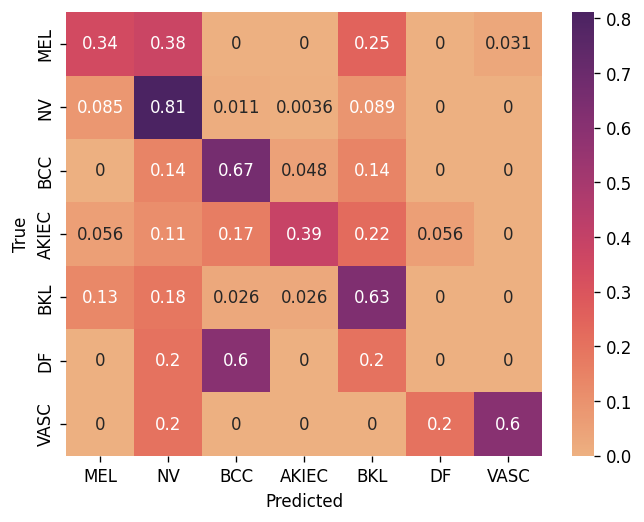

Model weights saved to saved_models/SimpleBNConv_Baseline model lr 0.0001 Adam WeightedRandomSampler.pth


In [ ]:
# 1d retraining the model fixing class imbalance
# Still using the baseline model

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv')
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv')


# create dataloader
# load the trainig data using weighted random sampler
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
model = models.SimpleBNConv()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


# Train model
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= "Baseline model lr 0.0001 Adam WeightedRandomSampler")

Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▅▆██
Accuracy_val,▁▇█▇█
Loss_train,█▄▂▂▁
Loss_val,█▂▁▂▂
UAR_train,▁▅▆██
UAR_val,▁▇▇██
Accuracy_train,0.66811
Accuracy_val,0.6225
Loss_train,0.92918
Loss_val,1.26819
UAR_train,0.6699


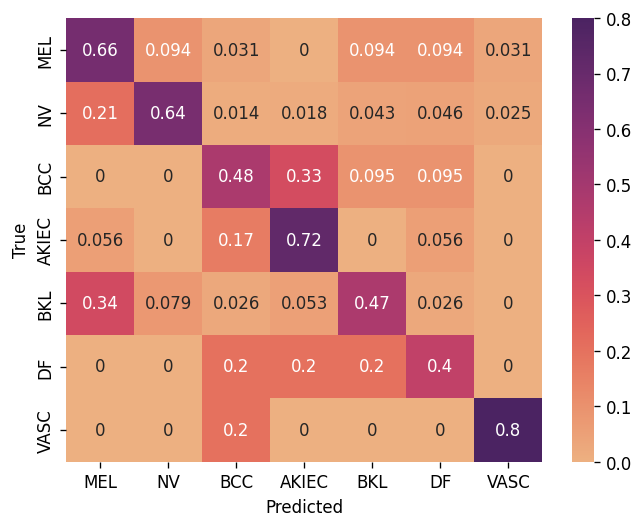

Model weights saved to saved_models/SimpleBNConv_Baseline model lr 0.001 Adam Augmentation WeightedRandomSampler.pth


In [ ]:
"""  Task 1e  """
# Augmentation true for training dataset

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv', augment=True)
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv', augment=False)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
model = models.SimpleBNConv()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


# Train model
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= "Baseline model lr 0.001 Adam Augmentation WeightedRandomSampler")


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▆▇▇█
Accuracy_val,▁▇█▇█
Loss_train,█▃▂▁▁
Loss_val,█▂▂▂▁
UAR_train,▁▆▇▇█
UAR_val,▁█▆▅▇
Accuracy_train,0.98302
Accuracy_val,0.73
Loss_train,0.06948
Loss_val,0.85153
UAR_train,0.9823


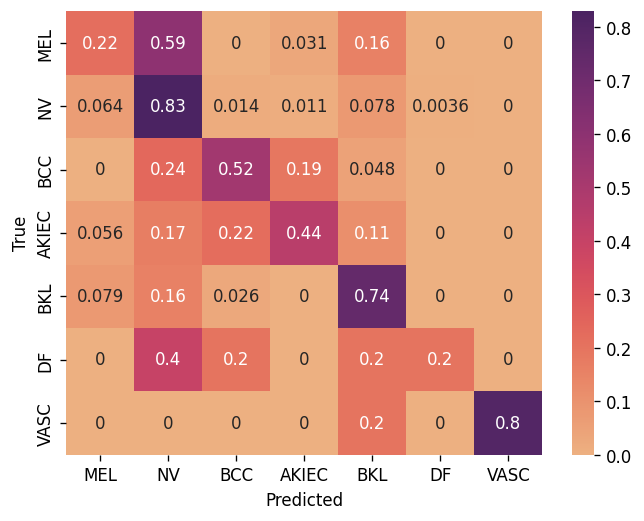

In [ ]:
"""  Task 1f  """
# Custom model training

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(42)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# Create datasets/loaders
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv', augment=False)
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv', augment=False)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
model = models.CustomClassificationModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


# Train model
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= "Custom Model2, Adam lr=0.0001, CrossEntropyLoss")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epochs:   0%|          | 0/5 [00:00<?, ?it/s]

Accuracy_train,▁▅▆▇█
Accuracy_val,▁▄▇▇█
Loss_train,█▆▄▂▁
Loss_val,█▅▃▂▁
UAR_train,▁▅▆▇█
UAR_val,▁▄▆█▇
Accuracy_train,0.64015
Accuracy_val,0.6475
Loss_train,1.33738
Loss_val,1.27701
UAR_train,0.64102


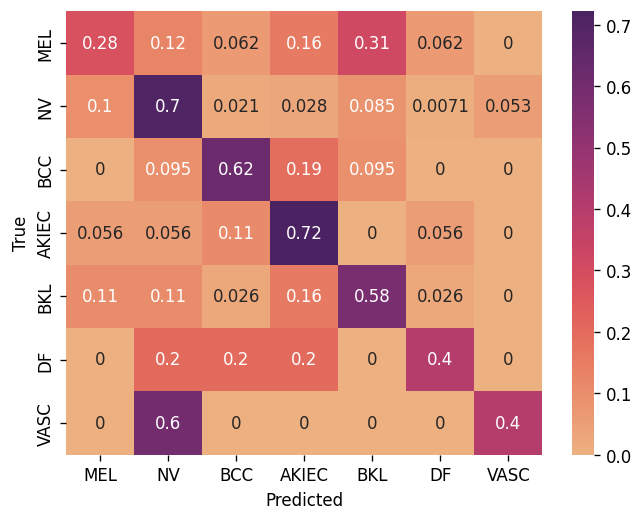

In [ ]:
"""  Task 1f  """
# Model training using resnet50
# Pre-trained model from model zoo
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

import datasets
import models
import train

torch.manual_seed(44)

NUM_EPOCHS = 5
BATCH_SIZE = 64

# dataset transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create datasets/loaders
train_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/train.csv', augment=False, transform=transform)
val_dataset = datasets.LesionDataset('/content/data/img',
                            '/content/data/img/val.csv', augment=False, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
model = models.construct_resnet50()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()


# Train model
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  IMG_CLASS_NAMES, NUM_EPOCHS, project_name="CSE5DL Assignment Task 1",
                  ident_str= "resnet50 model, Adam lr=0.0001, CrossEntropyLoss")

# Task 2 - News article classification

**MARKS**: 32

You will first create your own model to classify news articles into one of the following classes:

*   World
*   Sport
*   Business
*   Sci/Tech

You will then compare it to a pre-trained DistilBERT model that has been fine-tuned, similar to Lab 6. Note: using a model pre-trained on a source task for a new target task is called "transfer learning" whether you fine-tune it or not.

The data for this task is a subset of: https://github.com/mhjabreel/CharCnn_Keras/tree/master/data/ag_news_csv

## Task 2a. Exploring the dataset

**MARKS**: 3 (Code 2, Reports 1)

**INSTRUCTIONS**: Check for at least 2 data issues.

**REPORT**: What did you check for? What data issues exist, if any? Report anything you checked even if it turned out the data did not have that issue. We want to know what you are checking.

In [ ]:
import pandas as pd

with open('/content/data/txt/classes.txt') as f:
    TXT_CLASS_NAMES = [line.rstrip('\n') for line in f]

# column names for the dataset
column_names = ['Label', 'Title', 'Content']

# Read the CSV files and set the column names
train_df = pd.read_csv('/content/data/txt/train.csv', header=None, names=column_names)
val_df = pd.read_csv('/content/data/txt/val.csv', header=None, names=column_names)
train_df.head()

,Label,Title,Content
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


## Task 2b. Clustering and visualising embeddings from a pre-trained model

**MARKS**: 14 (Code 11, Reports 3)

**INSTRUCTIONS**:

*  Implement the `TextDataset` class in the `datasets.py` file. Consider adding a small code block to test your implementation, as provided in task 1b.

*   Complete `visualise_embeddings.py` and run it. Make sure you instantiate two different models to visualize. One is the sequence classification model and the other is the token classification model. For the sequence classification model the code will visualize the CLS token. For the token classification model the model will perform average pool over all output tokens except the CLS token output. If you don't understand this. Please take a look at the Lab 6 demo notebook.
* The `visualise_embeddings.py` file does the following:
    *   visualise embeddings of the news articles from the two pre-trained `'distilbert-base-uncased'` model (i.e. the models which have not yet been fine-tuned on the labels) using T-SNE. T-SNE is a popular dimensionality reduction method that takes data from a high dimensional space and reduces it to just two dimensions while trying to preserve the right distances between points. The visualization will represent each article by a point with a color corresponding to their true label. Ideally the colors are well separated into separate clusters. If this happens it will be really cool since it means we did not even need to fine-tune the model on our data, it is already able to separate the classes.
    *   Next the code will run K-Means clustering on the validation set to group the data into separate clusters. The code will then colour the points based on which cluster they belong to rather than the ground truth label.


**REPORT**: By looking at the resulting images of the two models (sequence classification and token classification), which two classes have the most similar embeddings? How can you tell? Did you expect this, if so, why, if not why not?

**CHALLENGE**: (8 marks) Only attempt this after completing the rest of Task 2.

*   Modify `visualise_embeddings.py` so that it can load the weights for a fine-tuned DistilBERT model. Then visualize the data points with their corresponding true labels.
*   Next instead of using K-Means for the second visualisation, use the model's own predicted labels to colour the points.

Present the resulting images in your report.

Any null values in training dataset:
Label      0
Title      0
Content    0
dtype: int64
 
Any null values in validation dataset:
Label      0
Title      0
Content    0
dtype: int64
 
Unique training labels:
[0 1 2 3]
 
Unique validation labels:
[0 1 2 3]
 


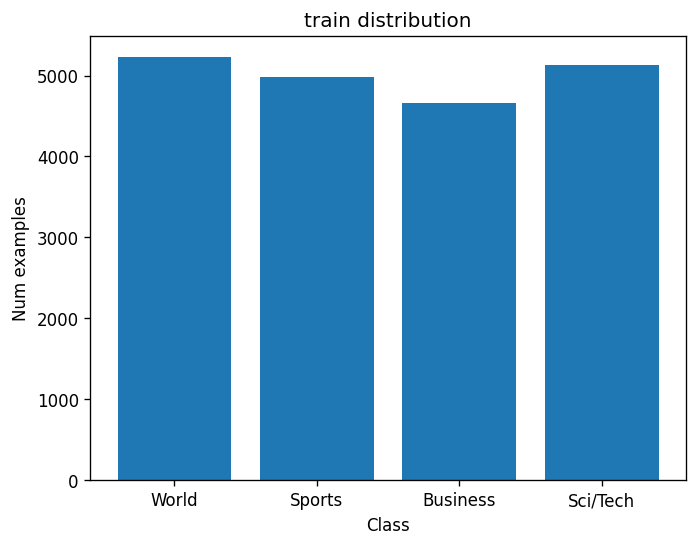

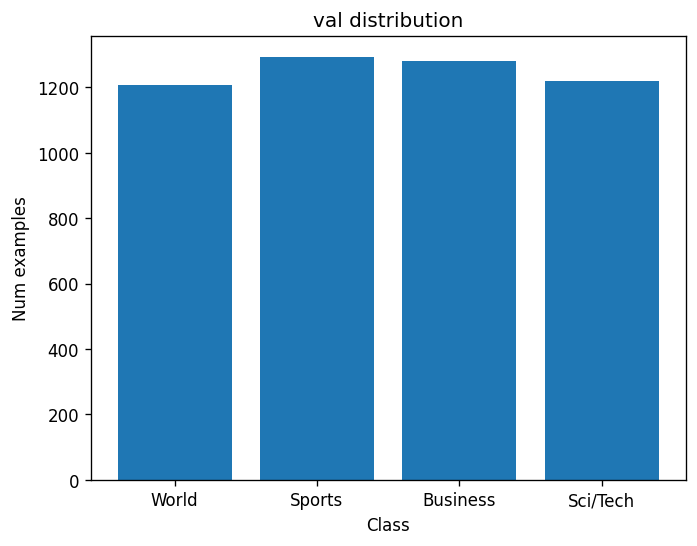

In [ ]:
import numpy as np
import explore
# TODO Check for data issues.
# Adjust class labels to start from 0
train_df['Label'] = train_df['Label'] - 1
val_df['Label'] = val_df['Label'] - 1

# check to see if the training and testing
# dataset has any null values
print("Any null values in training dataset:")
print(train_df.isnull().sum())
print(" ")
print("Any null values in validation dataset:")
print(val_df.isnull().sum())
print(" ")

# Again you should fill in the following:
train_labels = train_df['Label'].values
val_labels = val_df['Label'].values
#   - Note the csv file has class labels start from 1 but
#     pytorch expects class labels to start from 0 instead.
print("Unique training labels:")
print(np.unique(train_labels))
print(" ")
print("Unique validation labels:")
print(np.unique(val_labels))
print(" ")
#
# plot the labels using plot_label_distribution from explore.py
explore.plot_label_distribution(train_labels, 'train', TXT_CLASS_NAMES)
explore.plot_label_distribution(val_labels, 'val', TXT_CLASS_NAMES)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mo

Passing data through model:   0%|          | 0/79 [00:00<?, ?it/s]

Reducing dimensionality of embeddings...


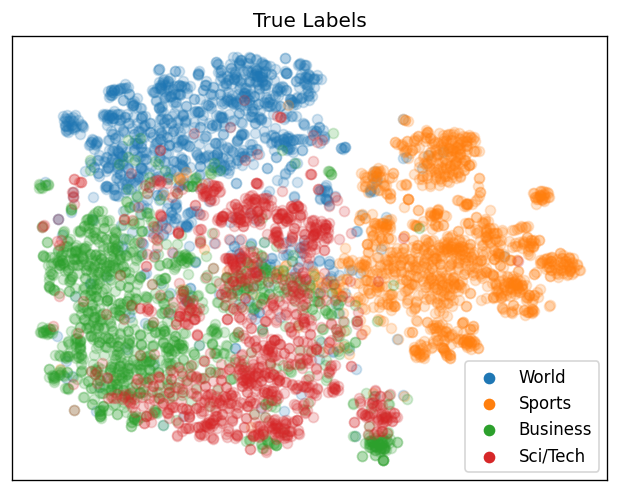

Fitting kmeans...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


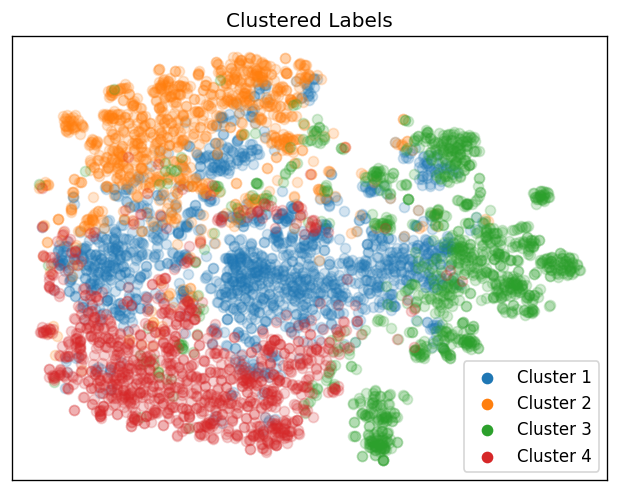

In [ ]:
import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the sequence classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForTokenClassification: ['vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from 

Passing data through model:   0%|          | 0/79 [00:00<?, ?it/s]

Reducing dimensionality of embeddings...


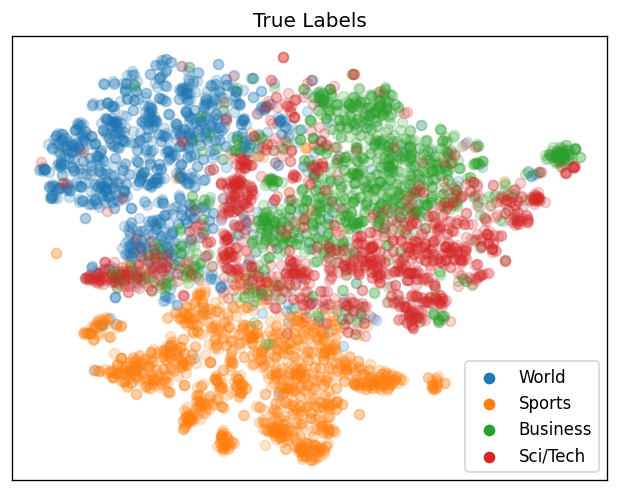

Fitting kmeans...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


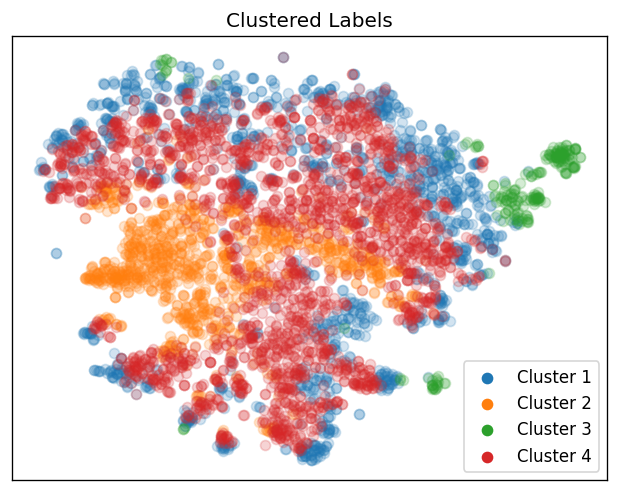

In [ ]:
import visualise_embeddings
SENTENCE_LEN = 80
# Run this code to visualize the results from embedding text using the token classification model
visualise_embeddings.mk_plots(SENTENCE_LEN, sequenceClassificationModel = False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification mo

Passing data through model:   0%|          | 0/79 [00:00<?, ?it/s]

Passing data through model:   0%|          | 0/79 [00:00<?, ?it/s]

Reducing dimensionality of embeddings...


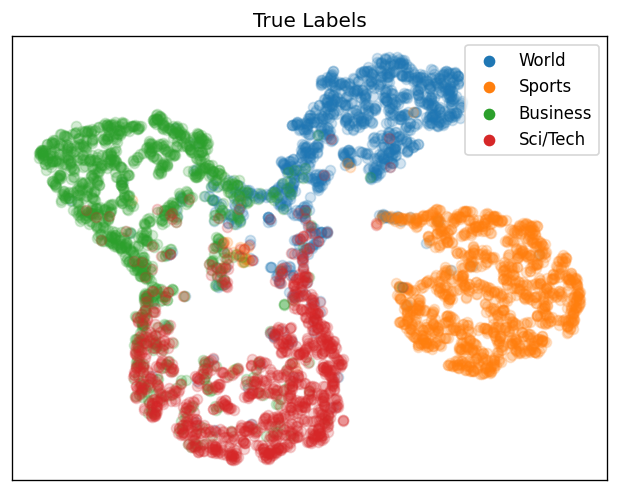

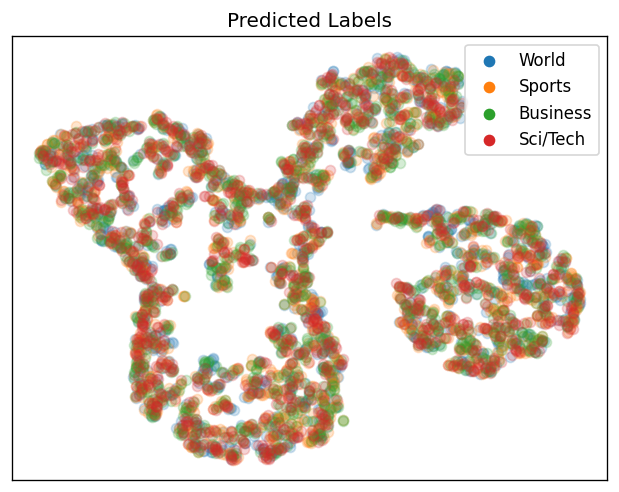

In [ ]:
# 2b Challenge
# fine-tuned distilbertmodel

import visualise_embeddings

SENTENCE_LEN = 80
# model path
model_fname = '/content/drive/My Drive/CSE5DL/Assignment CSE5DL 2024 release/saved_models/DistilBertForClassification_Retraied-DistilBertForClassification-4-epoch-lr-0.00001.pth'
# Run this code to visualize the results from embedding text using fine-tuned distilbertmodel
visualise_embeddings.mk_plots(SENTENCE_LEN, model_fname=model_fname, sequenceClassificationModel = True)


## Task 2c. Models

**MARKS**: 10 (Code 7, Reports 3)

**INSTRUCTIONS**:

*   Complete `TextMLP` in `models.py`. It should be a simple MLP with 8 Linear layers. It should first embed the inputs into a vocabulary of size 30522. Use an output feature size of 256 in all hidden layers and a feature size of 128 for the embeddings. Flatten the sentence after embedding, but before it goes into any Linear layers. Use batch norm and ReLU. Train for 1000 epochs with learning rate of 0.001 and a batch size of 512.
*   Complete `DistilBertForClassification` in `models.py`. This model should replace the last layer with an `nn.Linear` with 4 outputs for classification. Hint: Call `print()` on the DistilBERT model to observe the layers and their names before attempting this. Train for 4 epochs with learning rate of 0.001 and a batch size of 64.

Each of these should take around 10 minutes to complete.

Go to the [Model Training Cell](#task-2-model-training) at the end of Task 2 and fill in the required code to train the model.

**REPORT**: The saved model weights of a fine-tuned DistilBERT model are >200MB, but you only created one small `nn.Linear` layer. Why is the saved model so large?

**REPORT**: These models should accept only input with a dtype of `torch.int64`. What do each of these longs (`int64`) represent?

## Task 2d. Learning Rate

**MARKS**: 5 (Code 0, Reports 5)

Fine-tuning `DistilBertForSequenceClassification` with Adam at a learning rate of 0.001 results in very poor accuracy (~26%).

**INSTRUCTIONS**:

*   Uncomment the lines marked `Task 2d` in `train.py`
*   Execute the below cell to begin training and observe the class distribution per batch
*   Comment the lines marked `Task 2d` in `train.py` so they no longer interfere with the training.


**REPORT**: What is wrong with the class distributions? The learning rate can be changed to fix it. Should you increase or decrease the learning rate? How can you tell?

**REPORT**: After fixing the learning rate, comment on the relative train/val performance between these two models. Which model performed better on each partition? Is this expected? If so, why?

When you have finished Task 2d. Go back to Task 2b and finish the challenge if you are up to it. You should get a pleasant surprise if you have done everything correctly.


<a name="task-2-model-training"></a>
## Model Training Cell

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epochs:   0%|          | 0/1000 [00:00<?, ?it/s]

Accuracy_train,▁▅▄██▇▆█▇▇█████▇▇████████████████▇██████
Accuracy_val,▁▄▄▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇▇▇▇██████
Loss_train,█▅▆▁▂▂▃▁▂▂▁▁▁▁▁▂▂▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▂▁▁▁▁▂▁
Loss_val,▃▃▂▄▇▅▁▃▅▁▄▃▄▅▅▃▄▆▇▅▄▆█▇▇▅█▇▅▆▅█▇▅█▅▆▅█▆
UAR_train,▁▅▄██▇▆█▇▇█████▇▇███████████████████████
UAR_val,▁▄▄▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇█▇█▇▇▇▇██████
Accuracy_train,0.99845
Accuracy_val,0.7284
Loss_train,0.00217
Loss_val,1.98117
UAR_train,0.9984


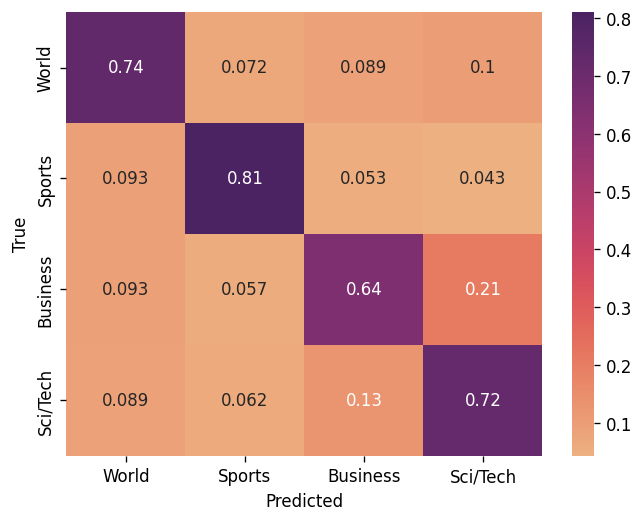

Model weights saved to saved_models/TextMLP_TextMLP 1000 epoch lr 0.001.pth


In [ ]:
# 2c TextMLP
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import datasets
import models
import train

torch.manual_seed(42)

SENTENCE_LEN = 80
NUM_EPOCHS = 1000
BATCH_SIZE = 512
vocab_size = 30522
hidden_size = 256


# Create datasets/loaders
# TODO: Create the data loaders from TextDatasets
train_dataset = datasets.TextDataset('/content/data/txt/train.csv', SENTENCE_LEN)
val_dataset = datasets.TextDataset('/content/data/txt/val.csv', SENTENCE_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
# TODO: Make an instance of your model
model = models.TextMLP(vocab_size=vocab_size, sentence_len=SENTENCE_LEN, hidden_size=hidden_size)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# TODO Change ident_str to something that identifying this experiment e.g. lr0001
# Train model. We are using the same train model function we wrote for task 1.
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  TXT_CLASS_NAMES, NUM_EPOCHS, project_name = "CSE5DL Assignment Task 2",
                  ident_str='TextMLP 1000 epoch lr 0.001')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.bias', 'classifier.bias', 'pre_classifier.we

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy_train,█▁▅█
Accuracy_val,█▁▁▁
Loss_train,▂█▁▁
Loss_val,█▁▃▃
UAR_train,█▃▁▁
UAR_val,▁▁▁▁
Accuracy_train,0.26135
Accuracy_val,0.2414
Loss_train,1.38549
Loss_val,1.38769
UAR_train,0.25


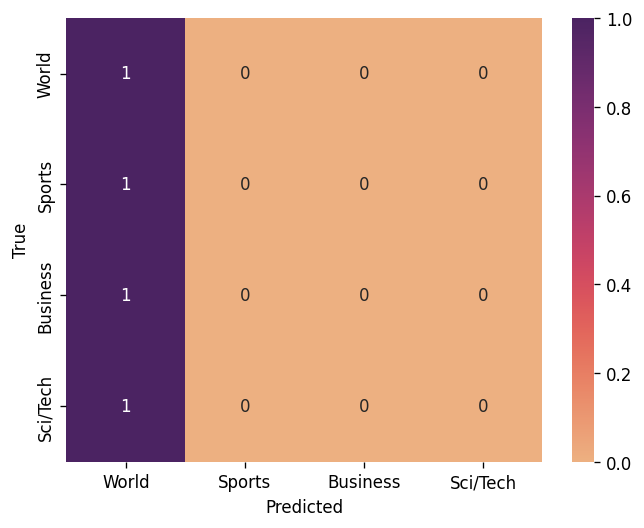

Model weights saved to saved_models/DistilBertForClassification_DistilBertForClassification 4 epoch lr 0.001.pth


In [ ]:
# 2c DistilBert
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import datasets
import models
import train

torch.manual_seed(42)

SENTENCE_LEN = 80
NUM_EPOCHS = 4
BATCH_SIZE = 64


# Create datasets/loaders
# TODO: Create the data loaders from TextDatasets
train_dataset = datasets.TextDataset('/content/data/txt/train.csv', SENTENCE_LEN)
val_dataset = datasets.TextDataset('/content/data/txt/val.csv', SENTENCE_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
# TODO: Make an instance of your model
model = models.DistilBertForClassification()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# TODO Change ident_str to something that identifying this experiment e.g. lr0001
# Train model. We are using the same train model function we wrote for task 1.
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  TXT_CLASS_NAMES, NUM_EPOCHS, project_name = "CSE5DL Assignment Task 2",
                  ident_str='DistilBertForClassification 4 epoch lr 0.001')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. ini

Epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Accuracy_train,▁▆▇█
Accuracy_val,▂▁█▅
Loss_train,█▃▂▁
Loss_val,█▆▁▆
UAR_train,▁▆▇█
UAR_val,▂▁█▅
Accuracy_train,0.94655
Accuracy_val,0.9002
Loss_train,0.16443
Loss_val,0.30036
UAR_train,0.94588


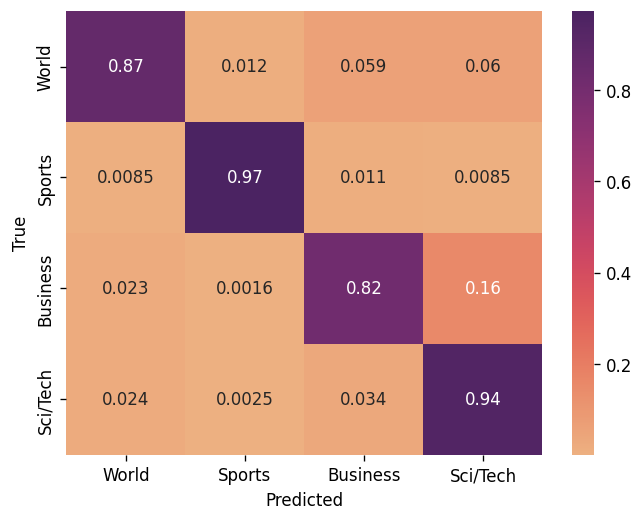

Model weights saved to saved_models/DistilBertForClassification_Retraied-DistilBertForClassification-4-epoch-lr-0.00001.pth


In [ ]:
# 2d retraining distilbert with new learning rate
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import datasets
import models
import train

torch.manual_seed(42)

SENTENCE_LEN = 80
NUM_EPOCHS = 4
BATCH_SIZE = 64


# Create datasets/loaders
# TODO: Create the data loaders from TextDatasets
train_dataset = datasets.TextDataset('/content/data/txt/train.csv', SENTENCE_LEN)
val_dataset = datasets.TextDataset('/content/data/txt/val.csv', SENTENCE_LEN)
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)


# Instantiate model, optimizer and criterion
# TODO: Make an instance of your model
model = models.DistilBertForClassification()

optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
criterion = nn.CrossEntropyLoss()

# TODO Change ident_str to something that identifying this experiment e.g. lr0001
# Train model. We are using the same train model function we wrote for task 1.
train.train_model(model, train_loader, val_loader, optimizer, criterion,
                  TXT_CLASS_NAMES, NUM_EPOCHS, project_name = "CSE5DL Assignment Task 2",
                  ident_str='Retraied-DistilBertForClassification-4-epoch-lr-0.00001')

# Super challenge task

This challenge task is quite difficult and will really test your mastery of PyTorch and `nn.Linear` layers.

**MARKS**: 5

We can manually assign weights to an `nn.Linear` like this:


In [ ]:
import torch
import torch.nn as nn
lin = nn.Linear(10, 20)
manual_weights = torch.arange(20*10).reshape(lin.weight.shape)
lin.weight.data[:] = manual_weights
lin.bias.data[:] = 0

But this does not calculate anything useful. A Linear layer simply performs a weighted sum (plus bias). We can choose weights/biases to perform known operations.

**INSTRUCTIONS**:
1.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer adds 1 to it's input.
2.   Given an `nn.Linear(1, 1)` layer, set the weights such that the layer calculates `y = 3x + 2`.
3.   Given an `nn.Linear(4, 1)` layer, set the weights such that the layer calculates the average of it's inputs.
4.   Given an `nn.Linear(4, 2)` layer, set the weights such that the layer calculates both the average of it's inputs and the sum of the inputs.
5.   Given an `nn.Linear(3, 3)` layer, set the weights such that the layer returns the inputs, but in reverse order.
6.   Given an `nn.Linear(5, 2)` layer, set the weights such that the layer always returns `(4,2)`


Note: We would never use this in a deep learning model; this challenge is to prove that you understand the mathematics and coding mechanics of the `nn.Linear` layer.

In [ ]:
import sc1
sc1.test_1(sc1.modify_lin_1)
sc1.test_2(sc1.modify_lin_2)
sc1.test_3(sc1.modify_lin_3)
sc1.test_4(sc1.modify_lin_4)
sc1.test_5(sc1.modify_lin_5)
sc1.test_6(sc1.modify_lin_6)

True

In [ ]:
# In the following cells the above functions are
# tested individually.
# The expected output is a boolean (True or False).
# If the modify_lin functions satisfy
# the test functions, a boolean will be printed on the screen.

In [ ]:
sc1.test_1(sc1.modify_lin_1)

True

In [ ]:
sc1.test_2(sc1.modify_lin_2)

True

In [ ]:
sc1.test_3(sc1.modify_lin_3)

True

In [ ]:
sc1.test_4(sc1.modify_lin_4)

True

In [ ]:
sc1.test_5(sc1.modify_lin_5)

True

In [ ]:
sc1.test_6(sc1.modify_lin_6)

True